#Data Preprocessing

In [ ]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load IMDb dataset
(ds_train, ds_test), ds_info = tfds.load(
    'imdb_reviews',
    split=("train", "test"),
    as_supervised=True,
    with_info=True
)

# Convert dataset to lists
def extract_text_and_labels(dataset):
    texts, labels = [], []
    for text, label in dataset:
        texts.append(text.numpy().decode('utf-8'))
        labels.append(label.numpy())
    return texts, labels

train_texts, train_labels = extract_text_and_labels(ds_train)
test_texts, test_labels = extract_text_and_labels(ds_test)

# Create DataFrames
train_df = pd.DataFrame({'review': train_texts, 'sentiment': train_labels})
test_df = pd.DataFrame({'review': test_texts, 'sentiment': test_labels})

# Text Preprocessing Function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
train_df['clean_review'] = train_df['review'].apply(preprocess_text)
test_df['clean_review'] = test_df['review'].apply(preprocess_text)

# Display sample data
train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.R5VX8Q_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.R5VX8Q_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.R5VX8Q_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


,review,sentiment,clean_review
0,This was an absolutely terrible movie. Don't b...,0,absolutely terrible movie lured christopher wa...
1,"I have been known to fall asleep during films,...",0,known fall asleep film usually due combination...
2,Mann photographs the Alberta Rocky Mountains i...,0,mann photograph alberta rocky mountain superb ...
3,This is the kind of film for a snowy Sunday af...,1,kind film snowy sunday afternoon rest world go...
4,"As others have mentioned, all the women that g...",1,others mentioned woman go nude film mostly abs...


#Feature Engineering

##Bag-of-Words (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Criar um vetorizador BoW
vectorizer_bow = CountVectorizer(max_features=10000)  # Considera as 10k palavras mais frequentes

# Ajustar e transformar os dados de treino e teste
X_train_bow = vectorizer_bow.fit_transform(train_df['clean_review'])
X_test_bow = vectorizer_bow.transform(test_df['clean_review'])

# Exibir o tamanho das matrizes geradas
print("Train Data Shape:", X_train_bow.shape)
print("Test Data Shape:", X_test_bow.shape)

# Exibir algumas features (tokens gerados)
print("Sample BoW Features:", vectorizer_bow.get_feature_names_out()[:10])

Train Data Shape: (25000, 10000)
Test Data Shape: (25000, 10000)
Sample BoW Features: ['00' '000' '01' '10' '100' '1000' '101' '11' '11th' '12']


##N-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Definir o número de N-Grams (exemplo: bigrams e trigrams)
N_GRAM_RANGE = (1, 2)  # Unigram + Bigram

# Criar o vetorizador com N-Grams
vectorizer = CountVectorizer(ngram_range=N_GRAM_RANGE, max_features=10000)  # Limita o vocabulário às 10k palavras mais frequentes

# Ajustar e transformar os dados de treino e teste
X_train_ngrams = vectorizer.fit_transform(train_df['clean_review'])
X_test_ngrams = vectorizer.transform(test_df['clean_review'])

# Exibir o tamanho das matrizes geradas
print("Train Data Shape:", X_train_ngrams.shape)
print("Test Data Shape:", X_test_ngrams.shape)

# Exibir algumas features (tokens gerados)
print("Sample N-Grams:", vectorizer.get_feature_names_out()[:10])

Train Data Shape: (25000, 10000)
Test Data Shape: (25000, 10000)
Sample N-Grams: ['00' '000' '10' '10 10' '10 line' '10 minute' '10 star' '10 year' '100'
 '100 year']


##TD-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criar o vetorizador TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=10000)  # Considera as 10k palavras mais importantes

# Ajustar e transformar os dados de treino e teste
X_train_tfidf = vectorizer_tfidf.fit_transform(train_df['clean_review'])
X_test_tfidf = vectorizer_tfidf.transform(test_df['clean_review'])

# Exibir o tamanho das matrizes geradas
print("Train Data Shape:", X_train_tfidf.shape)
print("Test Data Shape:", X_test_tfidf.shape)

# Exibir algumas features (tokens gerados)
print("Sample TF-IDF Features:", vectorizer_tfidf.get_feature_names_out()[:10])

Train Data Shape: (25000, 10000)
Test Data Shape: (25000, 10000)
Sample TF-IDF Features: ['00' '000' '01' '10' '100' '1000' '101' '11' '11th' '12']


##Word2Vec

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

import gensim

# Train Word2Vec model
w2v_model = gensim.models.Word2Vec(sentences=[text.split() for text in train_df['clean_review']], vector_size=100, window=5, min_count=2, workers=4)

# Function to get the average Word2Vec vector for a text
def text_to_w2v(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Convert train and test data
X_train_w2v = np.array([text_to_w2v(text, w2v_model) for text in train_df['clean_review']])
X_test_w2v = np.array([text_to_w2v(text, w2v_model) for text in test_df['clean_review']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Model Training & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(X_train, X_test, y_train, y_test, feature_name):
    print(f"Evaluating Logistic Regression with {feature_name}...")

    # Train model
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 50)

    return [feature_name, accuracy, precision, recall, f1]

# Apply to all feature engineering techniques
y_train = train_df['sentiment']
y_test = test_df['sentiment']

results = []
results.append(train_and_evaluate(X_train_bow, X_test_bow, y_train, y_test, "BoW"))
results.append(train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF"))
results.append(train_and_evaluate(X_train_ngrams, X_test_ngrams, y_train, y_test, "N-Grams"))
results.append(train_and_evaluate(X_train_w2v, X_test_w2v, y_train, y_test, "Word2Vec"))

Evaluating Logistic Regression with BoW...
Accuracy: 0.8497
Precision: 0.8589
Recall: 0.8368
F1-score: 0.8477
--------------------------------------------------
Evaluating Logistic Regression with TF-IDF...
Accuracy: 0.8792
Precision: 0.8791
Recall: 0.8794
F1-score: 0.8793
--------------------------------------------------
Evaluating Logistic Regression with N-Grams...
Accuracy: 0.8555
Precision: 0.8616
Recall: 0.8471
F1-score: 0.8543
--------------------------------------------------
Evaluating Logistic Regression with Word2Vec...
Accuracy: 0.8478
Precision: 0.8494
Recall: 0.8454
F1-score: 0.8474
--------------------------------------------------


#Results

In [ ]:
import pandas as pd

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=["Feature Engineering", "Accuracy", "Precision", "Recall", "F1-score"])
print(df_results)

  Feature Engineering  Accuracy  Precision   Recall  F1-score
0                 BoW   0.84968   0.858926  0.83680  0.847719
1              TF-IDF   0.87924   0.879088  0.87944  0.879264
2             N-Grams   0.85552   0.861595  0.84712  0.854296
3            Word2Vec   0.84780   0.849449  0.84544  0.847440


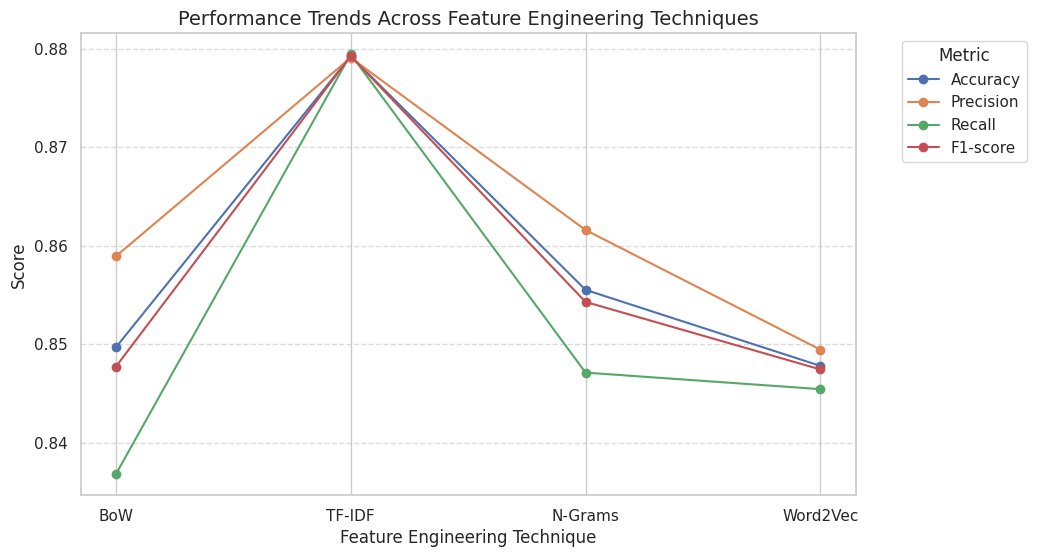

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    plt.plot(df_results["Feature Engineering"], df_results[metric], marker='o', label=metric)

# Customize plot
plt.title("Performance Trends Across Feature Engineering Techniques", fontsize=14)
plt.xlabel("Feature Engineering Technique", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()